## K-means Clustering with various shape of data
### Kulpitcha Sudyodprasert
#### Hildebrand Department of Petroleum and Geosystems Engineering, Cockrell School of Engineering

### Executive Summary
This project has objectives to show the effect of data shape to K-mean clustering method. K-mean clustering principle start from given k value of cluster. Then, random initia sample of each group and assign data to the group base on the minimum distance between data within the same group. The process is iterated until no more change on centroid of cluster. With this basic, K-mean clusters the data from the distance. Thus, data which has specific shape, specific correlation might not be work with K-mean clustering method. The alternative method shalle be consider when the data not match with K-mean clustering assumption. To visualize the data, or the data correlation, expert knowledge are factors which help in clustering method selection.

### Objective
1. To demonstate the effect of various shape of data with K-mean clustering method
2. To tuning hyperparameter of K-mean clustering
3. To compare the actual classification with the clustering of K-mean cluster method

### Introduction
K-means Clustering is one type of unsupervised method for classification. This method is the basic method which need
* K prototype as hyperparameter to set number of cluster 
* Iterative Solution: By randomly initial prototype in the feature space. Grouping the training sample updating to the nearest prototype. Then, the prototypes are adjusted to the centroid on the group. The process is repeat until here is no further update group to the training data
* Unsupervised Learning - the training data are not labeled and are assigned 𝐾labels based on their proximity to the prototypes in the feature space. The idea is that similar things, proximity in feature space, should belong to the same category.
* Feature Weighting - the procedure depends on the 'distance' between training samples and prototypes in feature space. Thus, the data normalization shall be done before perform K-mean clustering

K-mean clustering come with the assumption of 
1. Spherical, convex, isotropic clusters. This method minimize difference within cluster. 
2. Equal variance for all features
3. Equal prior probability for all cluster
4. similar sized/ frequency clusters

What if we apply K-mean clustering in the data which have cluster shape deviate for assumption. How K-mean clustering work? 

The photo below show the sample of K-mean work compare with other type of clustering. In this workflow will show the way that K-mean clustering work in some shape of data.

<img src ="K-Mean with various shape.png"/>

Comparison of clustering methods from https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html

#### Citing: 
The following code block is mainly from Professor Michael Pyrcz (@GeostatsGuy), SubsurfuceDataAnalytics_clustering.ipynb, SubsurfaceDataAnalystics_Basix_Data_Loading_Display.ipynb, SubsurfaceDataAnalytics_DataFrame.ipynb from GeostatsGuy GitHub and Chatgpt.

### Install Package

In [46]:
import numpy as np                        # ndarrys for gridded data
import pandas as pd                       # DataFrames for tabular data
import os                                 # set working directory, run executables
import matplotlib.pyplot as plt           # for plotting
import copy                               # for deep copies
import warnings                           # supress all warnings
warnings.filterwarnings('ignore')
import random
from sklearn.cluster import KMeans        # k-means clustering

### Set the working directory

In [47]:
#os.chdir("C:/Users/kulpitchas/OneDrive - PTT Exploration and Production Public Company Limited/Me/UT Fall 2023/Machine learning/Homework/Project/Kmean")                     # set the working directory with the input data file

### Loading Subsurface Data

In [48]:
data = pd.read_csv('https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/12_sample_data.csv')

### Work flow
1. Create various type of synthetic data  
   * Original subsurface data with/without normalization (df0) 
   * Linear synthetic data and group of linear data (df1, df2)
   * circle and ring synthetic data (df3)
   * pararelle synthetic data (df4)
   * star synthetic data (df5)
2. Perform K-mean clustering with 5 types of data with pre assume K value
3. Compare the result with the actual classification of synthetic data

Note: For step 1-3 will do in the same run for each synthetic data set.

4. Show walk through process of K-mean clustering in circle and ring data (explain why the data cluster not go as a ring)
5. Perform hyperparameter tuning of the K value of some data set (circle data and original subsurface data).

### 1. Subsurface Data Sample - df0

In [49]:
# extract 30% random to reduce the number of data
df = data.sample(frac=.30, random_state = 73073); df = df.reset_index()

#Normalization
df0 = copy.deepcopy(df)
df0 = df0.iloc[:,2:5]
pormin = df['Porosity'].min(); pormax = df['Porosity'].max()
AImin = df['AI'].min(); AImax = df['AI'].max()

df0['Porosity'] = df['Porosity']
df0['AI'] = df['AI']

df0['nPorosity'] = (df['Porosity']-pormin)/(pormax - pormin)
df0['nAI'] = (df['AI']-AImin)/(AImax - AImin)
df0.describe()

,X,Y,Facies,Porosity,AI,nPorosity,nAI
count,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000
mean,449.375000,542.979167,0.659722,0.190700,3746.825725,0.475986,0.421743
std,263.691435,289.228936,0.475456,0.031972,793.196589,0.255894,0.187385
min,0.000000,19.000000,0.000000,0.131230,1961.600397,0.000000,0.000000
25%,242.500000,300.000000,0.000000,0.166621,3167.631744,0.283258,0.284914
50%,400.000000,579.000000,1.000000,0.188733,3668.526774,0.460240,0.403245
75%,650.000000,800.000000,1.000000,0.217234,4244.264532,0.688350,0.539258
max,980.000000,979.000000,1.000000,0.256172,6194.573653,1.000000,1.000000


Note: To save space. I did not show the plot of data in this step. The scatter plot of data will be shown in the same plot with the result of K-mean clustering for comparison.

#### K-Mean Calculation via sklearn.cluster - df0

In [50]:
K = 2

kmeans = KMeans(n_clusters=K, random_state=14, n_init = 100).fit(df0.loc[:,['Porosity','AI']].values)
df0['kMeans'] = kmeans.labels_ + 1

kmeansn = KMeans(n_clusters=K, random_state=14, n_init = 100).fit(df0.loc[:,['nPorosity','nAI']].values)
df0['kMeansnorm'] = kmeansn.labels_ + 1

#### Show Scatter Plot compare result of K-mean clustering vs original classification - df0

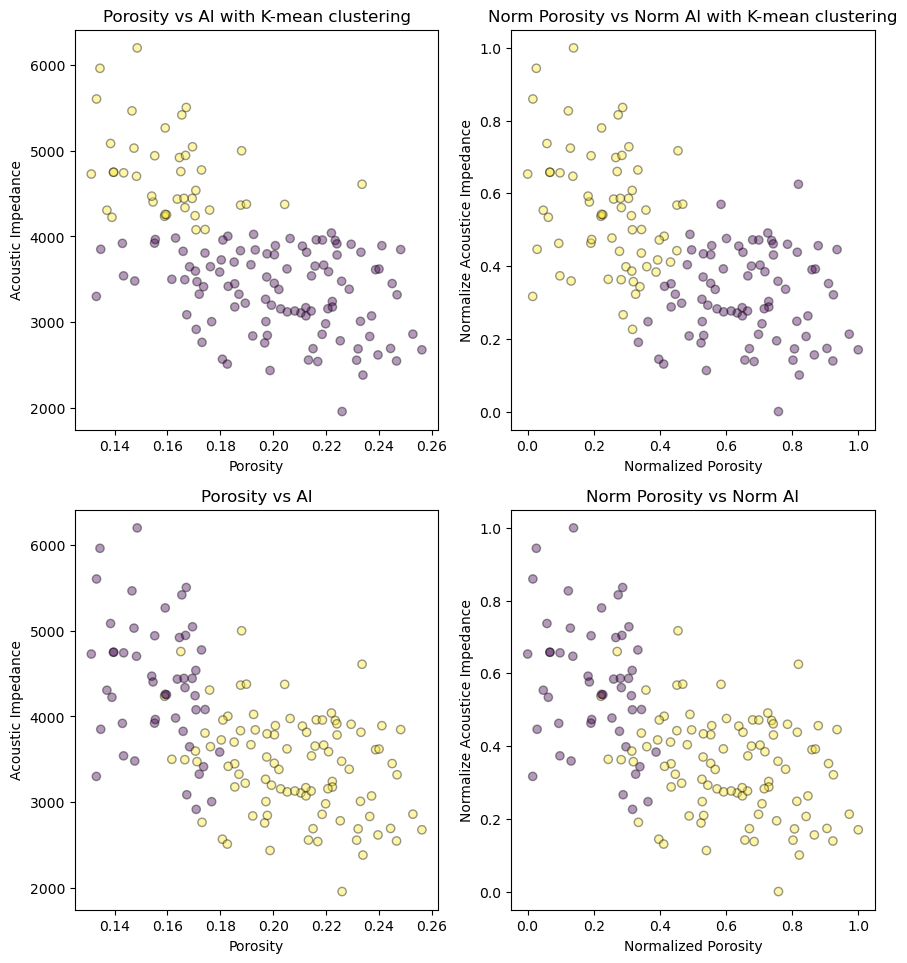

In [51]:
plt.figure(figsize=(8, 8))

plt.subplot(221)                          # plot the training data and K prototypes
plt.scatter(df0['Porosity'], df0['AI'], c=df0['kMeans'], alpha = 0.4, linewidths=1.0, edgecolors="black")
plt.title('Porosity vs AI with K-mean clustering'); plt.xlabel('Porosity'); plt.ylabel('Acoustic Impedance')

plt.subplot(222)                          # plot the training data and K prototypes
plt.scatter(df0['nPorosity'], df0['nAI'], c=df0['kMeansnorm'], alpha = 0.4, linewidths=1.0, edgecolors="black")
plt.title('Norm Porosity vs Norm AI with K-mean clustering'); plt.xlabel('Normalized Porosity'); plt.ylabel('Normalize Acoustice Impedance')

plt.subplot(223)                          # plot the training data and K prototypes
plt.scatter(df0['Porosity'], df0['AI'], c=df0['Facies'], alpha = 0.4, linewidths=1.0, edgecolors="black")
plt.title('Porosity vs AI'); plt.xlabel('Porosity'); plt.ylabel('Acoustic Impedance')

plt.subplot(224)                          # plot the training data and K prototypes
plt.scatter(df0['nPorosity'], df0['nAI'], c=df0['Facies'], alpha = 0.4, linewidths=1.0, edgecolors="black")
plt.title('Norm Porosity vs Norm AI'); plt.xlabel('Normalized Porosity'); plt.ylabel('Normalize Acoustice Impedance')
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.1, wspace=0.2, hspace=0.2)

#### Discussion - df0:
From dataset above, the data has the group distribution. With this distribution, K-mean clustering can work well to cluster the data base on the basic of minimizing the different between training data in each group.

### 2. Synthetic Linear Data - df1

In [52]:
#Create Linear data: y = x; x < 0.4, y = 2x+0.3; 0.4<x<0.7, y = -0.5x+0.5; x > 0.7
df1 = copy.deepcopy(df)
df1 = df1.iloc[:,2:5]
xmin = df['X'].min(); xmax = df['X'].max()

df1['X'] = (df['X']-xmin)/(xmax - xmin)
df1['Y'] = np.where(df1['X'] < 0.4, df1['X'],
                    np.where(df1['X'] < 0.7, df1['X'] * 2 + 0.3, -0.5*df1['X'] + 0.5))

ymin = df1['Y'].min(); ymax = df1['Y'].max()
df1['Y'] = (df1['Y']-ymin)/(ymax - ymin)

df1['Type'] = np.where(df1['X'] < 0.4,0,                      #set type for data depend on linear equation
                    np.where(df1['X'] < 0.7, 1, 2))

#Linear data with noise
np.random.seed(seed = 1350)                                 # set the random number seed
noise_stdev = 0.2
df1['Yn'] = df1['Y'] + np.random.normal(loc=0.0,scale=noise_stdev,size = len(df1))

ymin = df1['Yn'].min(); ymax = df1['Yn'].max()
df1['Yn'] = (df1['Yn']-ymin)/(ymax - ymin)

df1.describe()

,X,Y,Facies,Type,Yn
count,144.000000,144.000000,144.000000,144.000000,144.000000
mean,0.458546,0.329321,0.659722,0.763889,0.457019
std,0.269073,0.346871,0.475456,0.801974,0.199681
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.247449,0.068225,0.000000,0.000000,0.300896
50%,0.408163,0.156838,1.000000,1.000000,0.398751
75%,0.663265,0.711418,1.000000,1.000000,0.611390
max,1.000000,1.000000,1.000000,2.000000,1.000000


#### K-Mean Calculation via sklearn.cluster - df1

In [53]:
#K-Mean calculation
K = 3

kmeans = KMeans(n_clusters=K, random_state=14, n_init = 100).fit(df1.loc[:,['X','Y']].values)
df1['kMeans'] = kmeans.labels_ + 1

kmeansn = KMeans(n_clusters=K, random_state=14, n_init = 100).fit(df1.loc[:,['X','Yn']].values)
df1['kMeanswnoise'] = kmeansn.labels_ + 1

#### Show Scatter Plot compare result of K-mean clustering vs original classification - df1

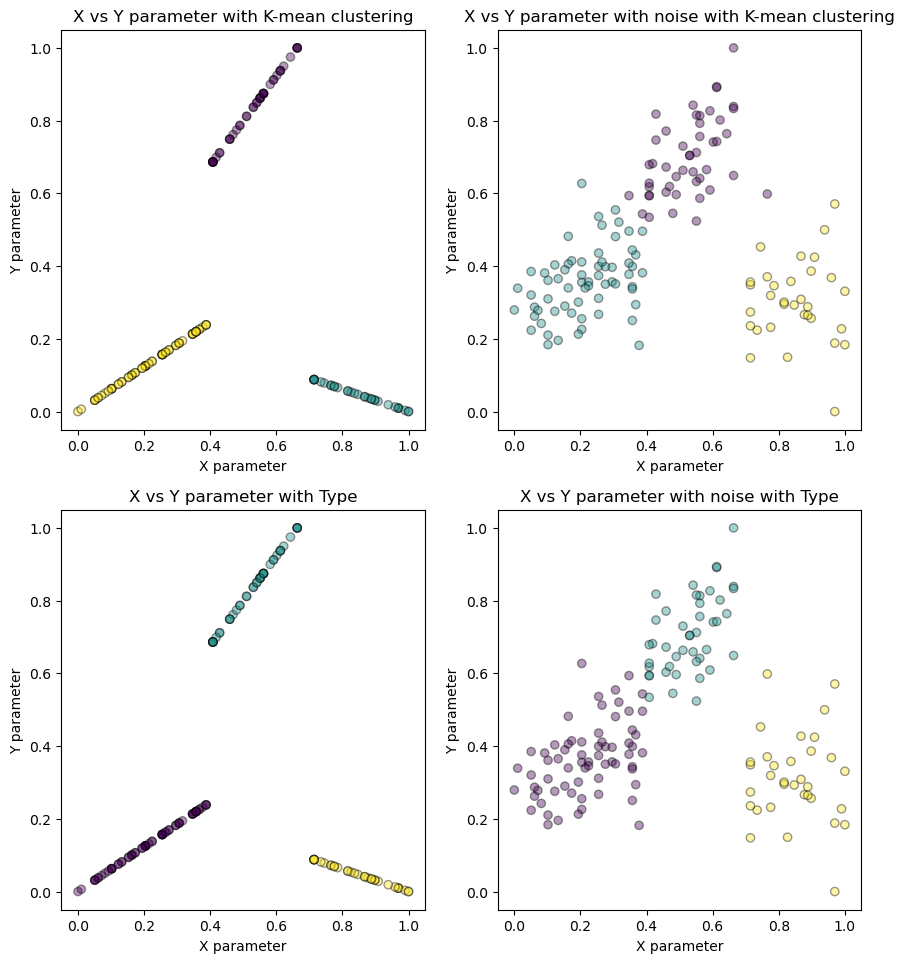

In [54]:
#Scatter Plot compare result of K-mean clustering vs original classification
plt.figure(figsize=(8, 8))

plt.subplot(221)                          # plot the training data and K prototypes
plt.scatter(df1['X'], df1['Y'], c=df1['kMeans'], alpha = 0.4, linewidths=1.0, edgecolors="black")
plt.title('X vs Y parameter with K-mean clustering'); plt.xlabel('X parameter'); plt.ylabel('Y parameter')

plt.subplot(222)                          # plot the training data and K prototypes
plt.scatter(df1['X'], df1['Yn'], c=df1['kMeanswnoise'], alpha = 0.4, linewidths=1.0, edgecolors="black")
plt.title('X vs Y parameter with noise with K-mean clustering'); plt.xlabel('X parameter'); plt.ylabel('Y parameter')

plt.subplot(223)                          # plot the training data and K prototypes
plt.scatter(df1['X'], df1['Y'], c=df1['Type'], alpha = 0.4, linewidths=1.0, edgecolors="black")
plt.title('X vs Y parameter with Type'); plt.xlabel('X parameter'); plt.ylabel('Y parameter')

plt.subplot(224)                          # plot the training data and K prototypes
plt.scatter(df1['X'], df1['Yn'], c=df1['Type'], alpha = 0.4, linewidths=1.0, edgecolors="black")
plt.title('X vs Y parameter with noise with Type'); plt.xlabel('X parameter'); plt.ylabel('Y parameter')
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.1, wspace=0.2, hspace=0.2)

#### Discussion - df1:
From dataset above, the data has the discting group distribution. K-mean clustering can work well to cluster the data base on the basic of minimizing the different between training data in each group.
However, in the area which has data overlapse, some data are clustered different from the original group.

### 2. Sythetic Linear Data - larger group - df2

In [55]:
#Several linear group of data

np.random.seed(seed = 1350)
xrand = np.random.random(30)
xrand2 = np.random.random(27)
xmin = xrand.min(); xmax = xrand.max()
xmin2 = xrand2.min(); xmax2 = xrand2.max()
x1 = (xrand-xmin)/(xmax-xmin)*0.4
x2 = 0.3+(xrand-xmin)/(xmax-xmin)*0.4
x3 = 0.6+(xrand-xmin)/(xmax-xmin)*0.4
x4 = (xrand2-xmin2)/(xmax2-xmin2)*0.45
x5 = 0.55+(xrand2-xmin2)/(xmax2-xmin2)*0.45
xall = []  # Initialize an empty list

#Make xall is 1D list of X1 to X5
for i in range(1, 6):
    xi = locals()["x" + str(i)]  # Access variables x1, x2, x3, x4, x5
    xall.append(xi) 

y1 = 2*x1 - 0.5 
y2 = x2
y3 = 1.2*x3
y4 = -x4 + 1
y5 = -x5 + 0.5
yall = []  # Initialize an empty list

#Make yall is 1D list of X1 to X5
for i in range(1, 6):
    yi = locals()["y" + str(i)]  # Access variables x1, x2, x3, x4, x5
    yall.append(yi)     
      
#Make 1 column of 144 value of data in xall include x1 to x5
xall_col = pd.concat([pd.Series(xi) for xi in xall], axis=0, ignore_index=True)
yall_col = pd.concat([pd.Series(yi) for yi in yall], axis=0, ignore_index=True)

# Combine xall_col and yall_col into a single DataFrame
df2 = pd.DataFrame({'X': xall_col, 'Y': yall_col})
df2['Y'] = (df2['Y']-df2['Y'].min())/(df2['Y'].max()-df2['Y'].min())

# Add a 'Type' column to df2
df2['Type'] = np.where(df2.index < 30, 0,
                        np.where(df2.index < 60, 1,
                                 np.where(df2.index < 90, 2,
                                          np.where(df2.index < 117, 3, 4))))
type = [0,1,2,3,4]

#Linear data with noise                             # set the random number seed
noise_stdev = 0.1
df2['Yn'] = df2['Y'] + np.random.normal(loc=0.0,scale=noise_stdev,size = len(df1))

ymin = df2['Yn'].min(); ymax = df2['Yn'].max()
df2['Yn'] = (df2['Yn']-ymin)/(ymax - ymin)
df2.describe()
#Citing: reference code from Chatgpt and some adjustment

,X,Y,Type,Yn
count,144.000000,144.000000,144.000000,144.000000
mean,0.503482,0.517928,1.937500,0.541177
std,0.288132,0.299570,1.410345,0.261451
min,0.000000,0.000000,0.000000,0.000000
25%,0.285231,0.228046,1.000000,0.299125
50%,0.497526,0.586780,2.000000,0.586195
75%,0.744150,0.764884,3.000000,0.766622
max,1.000000,1.000000,4.000000,1.000000


#### K-Mean Calculation via sklearn.cluster - df2

In [56]:
#K-Mean calculation
K = 5

kmeans = KMeans(n_clusters=K, random_state=14, n_init = 100).fit(df2.loc[:,['X','Y']].values)
df2['kMeans'] = kmeans.labels_ + 1

kmeansn = KMeans(n_clusters=K, random_state=14, n_init = 100).fit(df2.loc[:,['X','Yn']].values)
df2['kMeanswnoise'] = kmeansn.labels_ + 1

#### Show Scatter Plot compare result of K-mean clustering vs original classification - df2

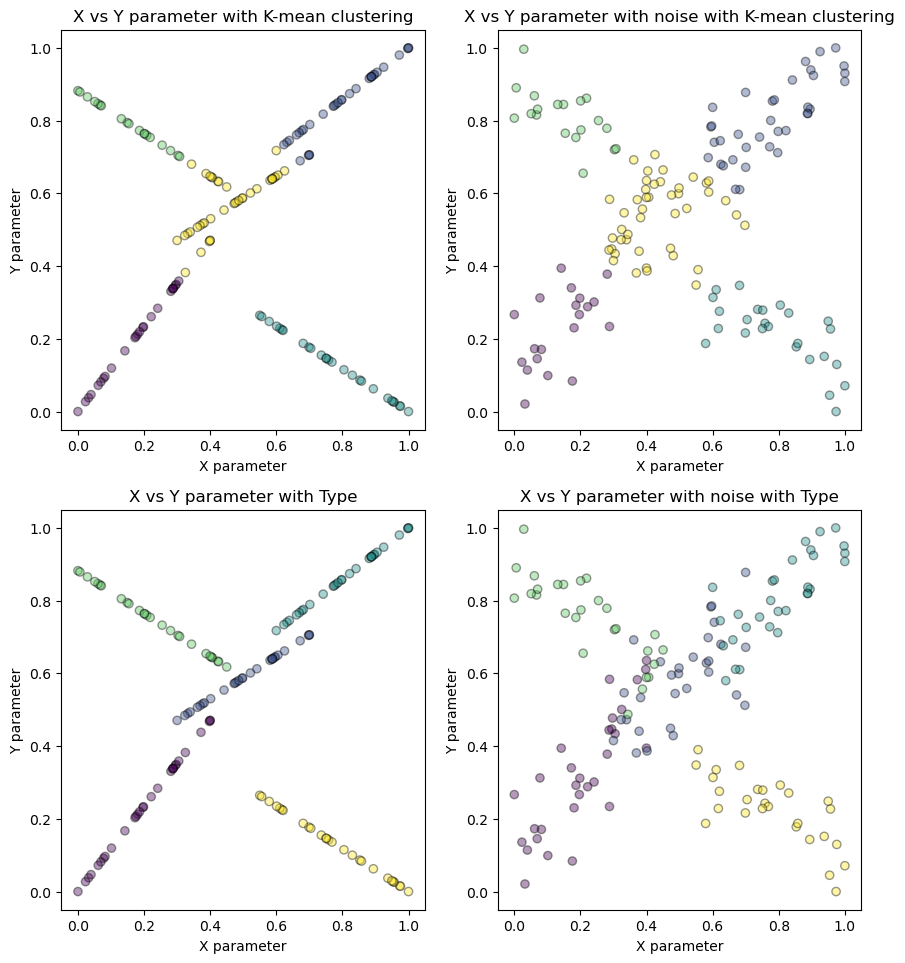

In [57]:
#Scatter Plot compare result of K-mean clustering vs original classification
plt.figure(figsize=(8, 8))

plt.subplot(221)                          # plot the training data and K prototypes
plt.scatter(df2['X'], df2['Y'], c=df2['kMeans'], alpha = 0.4, linewidths=1.0, edgecolors="black")
plt.title('X vs Y parameter with K-mean clustering'); plt.xlabel('X parameter'); plt.ylabel('Y parameter')

plt.subplot(222)                          # plot the training data and K prototypes
plt.scatter(df2['X'], df2['Yn'], c=df2['kMeanswnoise'], alpha = 0.4, linewidths=1.0, edgecolors="black")
plt.title('X vs Y parameter with noise with K-mean clustering'); plt.xlabel('X parameter'); plt.ylabel('Y parameter')

plt.subplot(223)                          # plot the training data and K prototypes
plt.scatter(df2['X'], df2['Y'], c=df2['Type'], alpha = 0.4, linewidths=1.0, edgecolors="black")
plt.title('X vs Y parameter with Type'); plt.xlabel('X parameter'); plt.ylabel('Y parameter')

plt.subplot(224)                          # plot the training data and K prototypes
plt.scatter(df2['X'], df2['Yn'], c=df2['Type'], alpha = 0.4, linewidths=1.0, edgecolors="black")
plt.title('X vs Y parameter with noise with Type'); plt.xlabel('X parameter'); plt.ylabel('Y parameter')
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.1, wspace=0.2, hspace=0.2)

#### Discussion - df2:
Since this dataset create from the 5 different data set with the dirrent linear regression function and some noises are added to data. The result make 5 unique data set in each location. However, since K-mean clustering make a group by minimize different between data in each group. The result might show similar data cluster. However, the concept is different. This show how the data shape effect to K-mean clustering method.

### 3. Circular data point - df3
citing: code block below from chat GPT

In [58]:
# Function to define the radius as a function of the angle
def circle_radius(theta, radius=1):
    return radius

# Set the random seed outside the function
np.random.seed(seed = 1350)

# Generate data points
num_points = 72
theta_values = np.linspace(0, 2 * np.pi, num_points)  # Create equally spaced angles
theta_values3 = np.linspace(0, 2 * np.pi, int(num_points))  # Create equally spaced angles
theta_values4 = np.linspace(0, 2 * np.pi, int(num_points*2))  # Create equally spaced angles
r0 = circle_radius(theta_values, 0.2)
r1 = circle_radius(theta_values)
r2 = circle_radius(theta_values, 0.5)
r3 = circle_radius(theta_values3)
r4 = np.random.random(int(num_points*2))

# Convert polar coordinates to Cartesian coordinates
x0 = r0 * np.cos(theta_values)
y0 = r0 * np.sin(theta_values)

x1 = r1 * np.cos(theta_values)
y1 = r1 * np.sin(theta_values)

x2 = r2 * np.cos(theta_values)
y2 = r2 * np.sin(theta_values)

x3 = r3 * np.cos(theta_values3)
y3 = r3 * np.sin(theta_values3) 

x4 = r4 * np.cos(theta_values4)
y4 = r4 * np.sin(theta_values4) 

xall =[]; yall = []
#Make xall is 1D list of X1 to X2
for i in range(0, 3):
    xi = locals()["x" + str(i)]  # Access variables x1, x2
    xall.append(xi) 

#Make xall is 1D list of X1 to X2
for i in range(0, 3):
    yi = locals()["y" + str(i)]  # Access variables x1, x2
    yall.append(yi) 

xall_col = pd.concat([pd.Series(xi) for xi in xall], axis=0, ignore_index=True)
yall_col = pd.concat([pd.Series(yi) for yi in yall], axis=0, ignore_index=True)

xfill =[]; yfill = []
#Make xfill is 1D list of X3 to X4
for i in range(3, 5):
    xi = locals()["x" + str(i)]  # Access variables x3, x4
    xfill.append(xi) 

#Make xall is 1D list of X3 to X4
for i in range(3, 5):
    yi = locals()["y" + str(i)]  # Access variables x3, x4
    yfill.append(yi) 

xfill_col = pd.concat([pd.Series(xi) for xi in xfill], axis=0, ignore_index=True)
yfill_col = pd.concat([pd.Series(yi) for yi in yfill], axis=0, ignore_index=True)


# Combine xall_col and yall_col into a single DataFrame
df3 = pd.DataFrame({'X': xall_col, 'Y': yall_col, 'X_fill': xfill_col, 'Y_fill': yfill_col})

# Add a 'Type' column to df12
df3['Type'] = np.where(df3.index < 72, 0,
                       np.where(df3.index < 144,1,2))

#Add noise in noise
np.random.seed(seed = 1350)                                 # set the random number seed
noise_stdev = 0.1
df3['Yn'] = df3['Y'] + np.random.normal(loc=0.0,scale=noise_stdev,size = len(df3))

ymin = df3['Yn'].min(); ymax = df3['Yn'].max()
df3['Yn'] = (df3['Yn']-ymin)/(ymax - ymin)

df3.describe()

,X,Y,X_fill,Y_fill,Type,Yn
count,216.000000,2.160000e+02,216.000000,2.160000e+02,216.000000,216.000000
mean,0.007870,0.000000e+00,-0.002320,1.367114e-02,1.000000,0.517844
std,0.467908,4.615192e-01,0.516322,5.172158e-01,0.818393,0.217753
min,-0.999021,-9.997553e-01,-0.999021,-9.997553e-01,0.000000,0.000000
25%,-0.233691,-2.386970e-01,-0.365533,-3.326482e-01,0.000000,0.386497
50%,0.004420,-2.449294e-17,0.005678,-1.121027e-16,1.000000,0.516465
75%,0.252996,2.386970e-01,0.325801,3.683494e-01,2.000000,0.642195
max,1.000000,9.997553e-01,1.000000,9.997553e-01,2.000000,1.000000


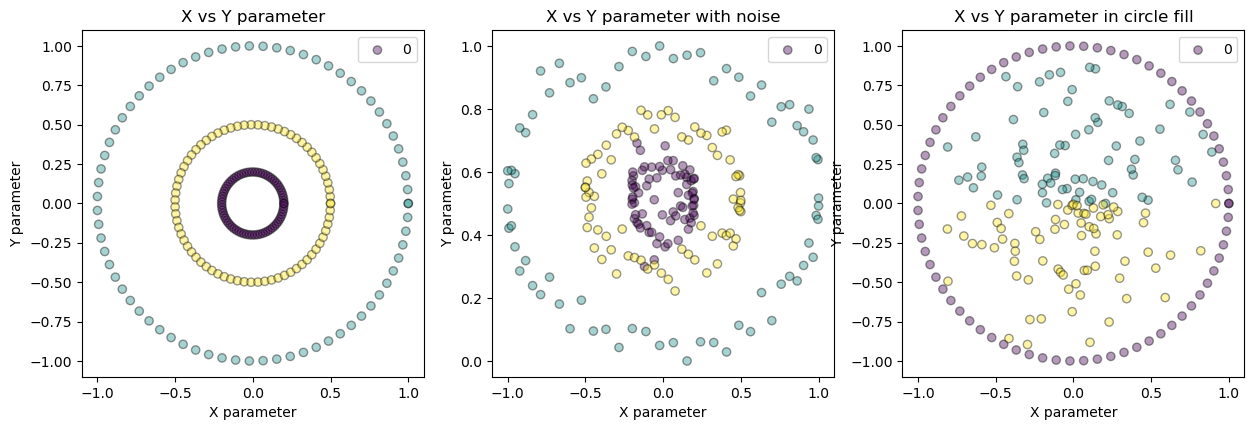

In [59]:
#fig, axs = plt.subplots(1, 3, figsize=(15, 4.5))
plt.figure(figsize=(15, 4.5))
plt.subplot(131)
plt.scatter(df3['X'], df3['Y'], c=df3['Type'], alpha = 0.4, linewidths=1.0, edgecolors="black")
plt.title('X vs Y parameter'); plt.xlabel('X parameter'); plt.ylabel('Y parameter')
plt.legend(type)
#plt.show()

plt.subplot(132)
plt.scatter(df3['X'], df3['Yn'], c=df3['Type'], alpha = 0.4, linewidths=1.0, edgecolors="black")
plt.title('X vs Y parameter with noise'); plt.xlabel('X parameter'); plt.ylabel('Y parameter')
plt.legend(type)
#plt.show()

plt.subplot(133)
plt.scatter(df3['X_fill'], df3['Y_fill'], c=df3['Type'], alpha = 0.4, linewidths=1.0, edgecolors="black")
plt.title('X vs Y parameter in circle fill'); plt.xlabel('X parameter'); plt.ylabel('Y parameter')
plt.legend(type)
plt.show()

#### K-Mean Calculation via sklearn.cluster - df3

In [60]:
#K-Mean calculation
K = 3

kmeans = KMeans(n_clusters=K, random_state=14, n_init = 100).fit(df3.loc[:,['X','Y']].values)
df3['kMeans'] = kmeans.labels_ + 1

kmeansn = KMeans(n_clusters=K, random_state=14, n_init = 100).fit(df3.loc[:,['X','Yn']].values)
df3['kMeanswnoise'] = kmeansn.labels_ + 1

kmeansfill = KMeans(n_clusters=K, random_state=14, n_init = 100).fit(df3.loc[:,['X_fill','Y_fill']].values)
df3['kMeansfill'] = kmeansfill.labels_ + 1

#### Show Scatter Plot compare result of K-mean clustering vs original classification - df3

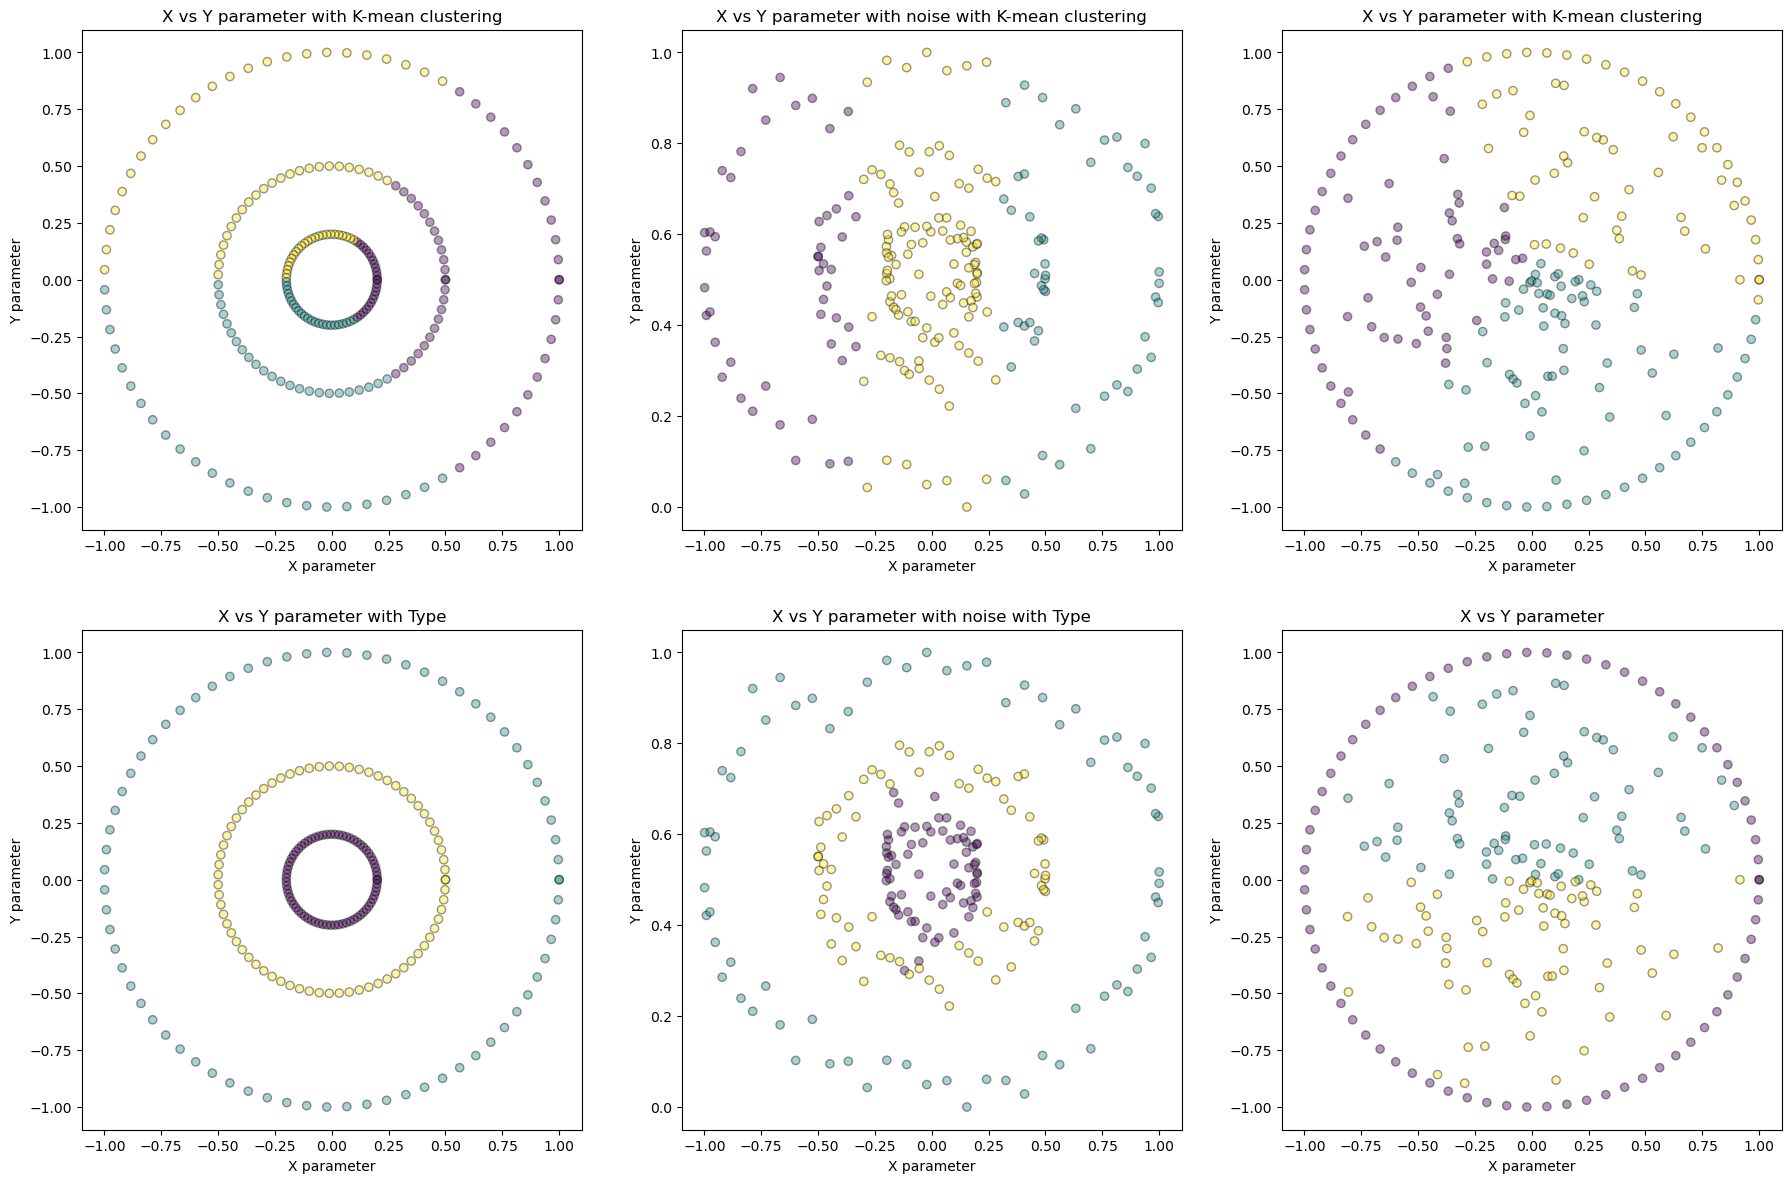

In [61]:
#Scatter Plot compare result of K-mean clustering vs original classification
plt.figure(figsize=(17, 10))

plt.subplot(231)                          # plot the training data and K prototypes
plt.scatter(df3['X'], df3['Y'], c=df3['kMeans'], alpha = 0.4, linewidths=1.0, edgecolors="black")
plt.title('X vs Y parameter with K-mean clustering'); plt.xlabel('X parameter'); plt.ylabel('Y parameter')

plt.subplot(232)                          # plot the training data and K prototypes
plt.scatter(df3['X'], df3['Yn'], c=df3['kMeanswnoise'], alpha = 0.4, linewidths=1.0, edgecolors="black")
plt.title('X vs Y parameter with noise with K-mean clustering'); plt.xlabel('X parameter'); plt.ylabel('Y parameter')

plt.subplot(233)                          # plot the training data and K prototypes
plt.scatter(df3['X_fill'], df3['Y_fill'], c=df3['kMeansfill'], alpha = 0.4, linewidths=1.0, edgecolors="black")
plt.title('X vs Y parameter with K-mean clustering'); plt.xlabel('X parameter'); plt.ylabel('Y parameter')

plt.subplot(234)                          # plot the training data and original class
plt.scatter(df3['X'], df3['Y'], c=df3['Type'], alpha = 0.4, linewidths=1.0, edgecolors="black")
plt.title('X vs Y parameter with Type'); plt.xlabel('X parameter'); plt.ylabel('Y parameter')

plt.subplot(235)                          # plot the training data and original class
plt.scatter(df3['X'], df3['Yn'], c=df3['Type'], alpha = 0.4, linewidths=1.0, edgecolors="black")
plt.title('X vs Y parameter with noise with Type'); plt.xlabel('X parameter'); plt.ylabel('Y parameter')

plt.subplot(236)                          # plot the training data and original class
plt.scatter(df3['X_fill'], df3['Y_fill'], c=df3['Type'], alpha = 0.4, linewidths=1.0, edgecolors="black")
plt.title('X vs Y parameter'); plt.xlabel('X parameter'); plt.ylabel('Y parameter')
#plt.xlim(-1.1, 1.1); plt.ylim(-1.1, 1.1)
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.1, wspace=0.2, hspace=0.2)

#### Discussion - df3:
The circle data shape show obviously the different concept that K-mean cluster use to cluster the data. Meanwhile we cluster data as a ring with varius radius, K-mean clustering data by minimize distance between the same group. This case show the failure on clustering data via K-mean clustering. Other methods such as DBSCAN shall be consider.

### 4. Paralell data - df4

In [62]:
#Paralell data: y = 0.8; x is odd, y = 0.3; x is even
df4 = copy.deepcopy(df)
df4 = df4.iloc[:,2:5]

xmin = df4['X'].min(); xmax = df4['X'].max()
df4['X'] = (df['X']-xmin)/(xmax - xmin)

num_row = 144
for i in range(num_row):
    value = 0.4 if i % 2 == 0 else 0.7   #can change value from 0.4 to 0.2 and 0.7 to 0.8 to see different result
    ttype = 0  if i % 2 == 0 else 1
    df4.loc[i,'Y'] = value
    df4.loc[i,'Type'] = ttype

#Add noise to data
np.random.seed(seed = 1350)                                 # set the random number seed
noise_stdev = 0.03
df4['Yn'] = df4['Y'] + np.random.normal(loc=0.0,scale=noise_stdev,size = len(df4))

df4.describe()

,X,Y,Facies,Type,Yn
count,144.000000,144.000000,144.000000,144.000000,144.000000
mean,0.458546,0.550000,0.659722,0.500000,0.547131
std,0.269073,0.150524,0.475456,0.501745,0.158917
min,0.000000,0.400000,0.000000,0.000000,0.302824
25%,0.247449,0.400000,0.000000,0.000000,0.389240
50%,0.408163,0.550000,1.000000,0.500000,0.558790
75%,0.663265,0.700000,1.000000,1.000000,0.700166
max,1.000000,0.700000,1.000000,1.000000,0.780710


#### K-Mean Calculation via sklearn.cluster - df4

In [63]:
#K-mean calculation
K = 2

kmeans = KMeans(n_clusters=K, random_state=14, n_init = 100).fit(df4.loc[:,['X','Y']].values)
df4['kMeans'] = kmeans.labels_ + 1

kmeansn = KMeans(n_clusters=K, random_state=14, n_init = 100).fit(df4.loc[:,['X','Yn']].values)
df4['kMeanswnoise'] = kmeansn.labels_ + 1

#### Show Scatter Plot compare result of K-mean clustering vs original classification - df4

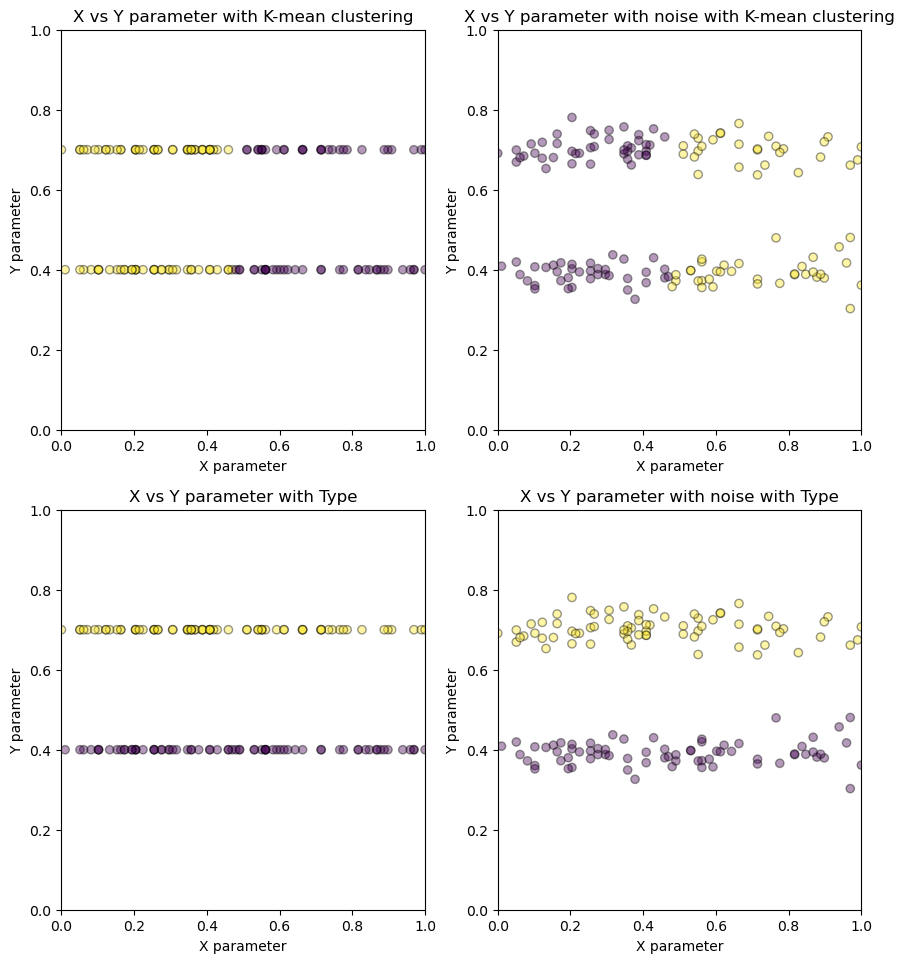

In [64]:
#Scatter Plot compare result of K-mean clustering vs original classification
plt.figure(figsize=(8, 8))

plt.subplot(221)                          # plot the training data and K prototypes
plt.scatter(df4['X'], df4['Y'], c=df4['kMeans'], alpha = 0.4, linewidths=1.0, edgecolors="black")
plt.title('X vs Y parameter with K-mean clustering'); plt.xlabel('X parameter'); plt.ylabel('Y parameter')
plt.xlim(0, 1); plt.ylim(0, 1)
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.1, wspace=0.2, hspace=0.2)

plt.subplot(222)                          # plot the training data and K prototypes
plt.scatter(df4['X'], df4['Yn'], c=df4['kMeanswnoise'], alpha = 0.4, linewidths=1.0, edgecolors="black")
plt.title('X vs Y parameter with noise with K-mean clustering'); plt.xlabel('X parameter'); plt.ylabel('Y parameter')
plt.xlim(0, 1); plt.ylim(0, 1)
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.1, wspace=0.2, hspace=0.2)

plt.subplot(223)                          # plot the training data and K prototypes
plt.scatter(df4['X'], df4['Y'], c=df4['Type'], alpha = 0.4, linewidths=1.0, edgecolors="black")
plt.title('X vs Y parameter with Type'); plt.xlabel('X parameter'); plt.ylabel('Y parameter')
plt.xlim(0, 1); plt.ylim(0, 1)
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.1, wspace=0.2, hspace=0.2)

plt.subplot(224)                          # plot the training data and K prototypes
plt.scatter(df4['X'], df4['Yn'], c=df4['Type'], alpha = 0.4, linewidths=1.0, edgecolors="black")
plt.title('X vs Y parameter with noise with Type'); plt.xlabel('X parameter'); plt.ylabel('Y parameter')
plt.xlim(0, 1); plt.ylim(0, 1)
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.1, wspace=0.2, hspace=0.2)

#### Discussion-df4:
The parallel data create from different 2 linear line. The category is set from the difference on each line. K-mean clustering cluster the data in different way which make the cluster result shows in different from the original classification. However, if the distance between parallel line is far enough, K-mean clustering can group the data by the line as per original data. We can change the X and Y value in code above to see the result.

### 5. * Shape data - df7

In [65]:
# 1. Do X shape data
# i odd: y = x, i even: y = -x
df5 = copy.deepcopy(df)
df5 = df5.iloc[:,2:4]
xmin = df5['X'].min(); xmax = df5['X'].max()
df5['X'] = (((df5['X']-xmin)/(xmax - xmin))*2)-1

num_rows = len(df5)  # Corrected to use the length of df5
for i in range(num_rows):
    value = df5.loc[i, 'X'] if i % 2 == 0 else -df5.loc[i, 'X']  # Corrected indexing
    ttype = 0  if i % 2 == 0 else 1
    df5.loc[i, 'Y'] = value
    df5.loc[i,'Type'] = ttype

#Normalize data
df5['Y'] = (df5['Y']-df5['Y'].min())/(df5['Y'].max()-df5['Y'].min()) 
df5['X'] = (df5['X']-df5['X'].min())/(df5['X'].max()-df5['X'].min())      

df5.describe()

,X,Y,Type
count,144.000000,144.000000,144.000000
mean,0.458546,0.517645,0.500000
std,0.269073,0.271693,0.501745
min,0.000000,0.000000,0.000000
25%,0.247449,0.285714,0.000000
50%,0.408163,0.545918,0.500000
75%,0.663265,0.744898,1.000000
max,1.000000,1.000000,1.000000


In [66]:
# 2. Do + shape data
df6 = copy.deepcopy(df.iloc[0:90,:])
df6 = df6.iloc[:, 2:4]
xmin = df6['X'].min(); xmax = df6['X'].max()
df6['X'] = (((df6['X']-xmin)/(xmax - xmin)))

for i in range(90,144):
    df6.loc[i,['X']] = 0.5
    df6.loc[i,['Y']] = random.random()

# Apply the function to each row to generate 'Y'
df6.loc[0:97, ['Y']] = 0.5
df6['Type'] = np.where(df6['X'] ==0.5, 2, 3)

df6.describe()

,X,Y,Type
count,144.000000,144.000000,144.000000
mean,0.467251,0.496591,2.625000
std,0.213996,0.156052,0.485813
min,0.000000,0.003469,2.000000
25%,0.357895,0.500000,2.000000
50%,0.500000,0.500000,3.000000
75%,0.501316,0.500000,3.000000
max,1.000000,0.991686,3.000000


In [67]:
# 3. Combine x shape and + shape data
df7 = pd.concat([df5, df6], ignore_index=True)

#Add noise in data
np.random.seed(seed = 1350)                                 # set the random number seed
noise_stdev = 0.03
df7['Yn'] = df7['Y'] + np.random.normal(loc=0.0,scale=noise_stdev,size = len(df7))
df7['Xn'] = df7['X'] + np.random.normal(loc=0.0,scale=noise_stdev,size = len(df7))

#Normalize data
ymin = df7['Yn'].min(); ymax = df7['Yn'].max()
df7['Yn'] = (df7['Yn']-ymin)/(ymax - ymin)

xmin = df7['Xn'].min(); xmax = df7['Xn'].max()
df7['Xn'] = (df7['Xn']-xmin)/(xmax - xmin)
df7.describe()

,X,Y,Type,Yn,Xn
count,288.000000,288.000000,288.000000,288.000000,288.000000
mean,0.462899,0.507118,1.562500,0.513756,0.451298
std,0.242714,0.221415,1.172975,0.202338,0.235467
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.271590,0.407630,0.750000,0.444028,0.270381
50%,0.500000,0.500000,1.500000,0.511391,0.465280
75%,0.579619,0.612245,3.000000,0.615052,0.565698
max,1.000000,1.000000,3.000000,1.000000,1.000000


Text(0, 0.5, 'Y parameter')

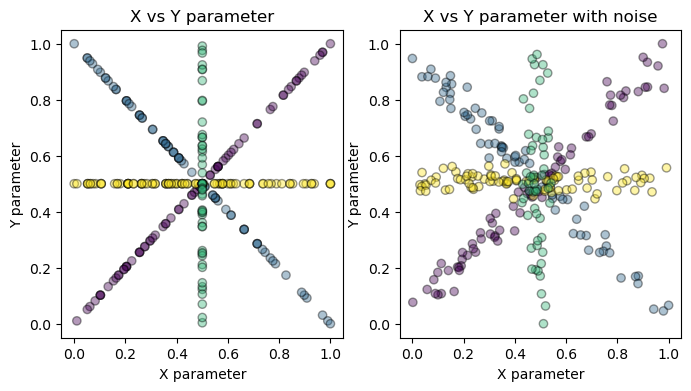

In [68]:
plt.figure(figsize=(8, 4))
plt.subplot(121)
plt.scatter(df7['X'], df7['Y'], c=df7['Type'], alpha = 0.4, linewidths=1.0, edgecolors="black")
plt.title('X vs Y parameter'); plt.xlabel('X parameter'); plt.ylabel('Y parameter')

plt.subplot(122)
plt.scatter(df7['Xn'], df7['Yn'], c=df7['Type'], alpha = 0.4, linewidths=1.0, edgecolors="black")
plt.title('X vs Y parameter with noise'); plt.xlabel('X parameter'); plt.ylabel('Y parameter')

#### K-Mean Calculation via sklearn.cluster - df7

In [69]:
#K-Mean calculation
K = 4
kmeans = KMeans(n_clusters=K, random_state=14, n_init = 100).fit(df7.loc[:,['X','Y']].values)
df7['kMeans'] = kmeans.labels_ + 1

kmeansn = KMeans(n_clusters=K, random_state=14, n_init = 100).fit(df7.loc[:,['Xn','Yn']].values)
df7['kMeanswnoise'] = kmeansn.labels_ + 1

#### Show Scatter Plot compare result of K-mean clustering vs original classification - df7

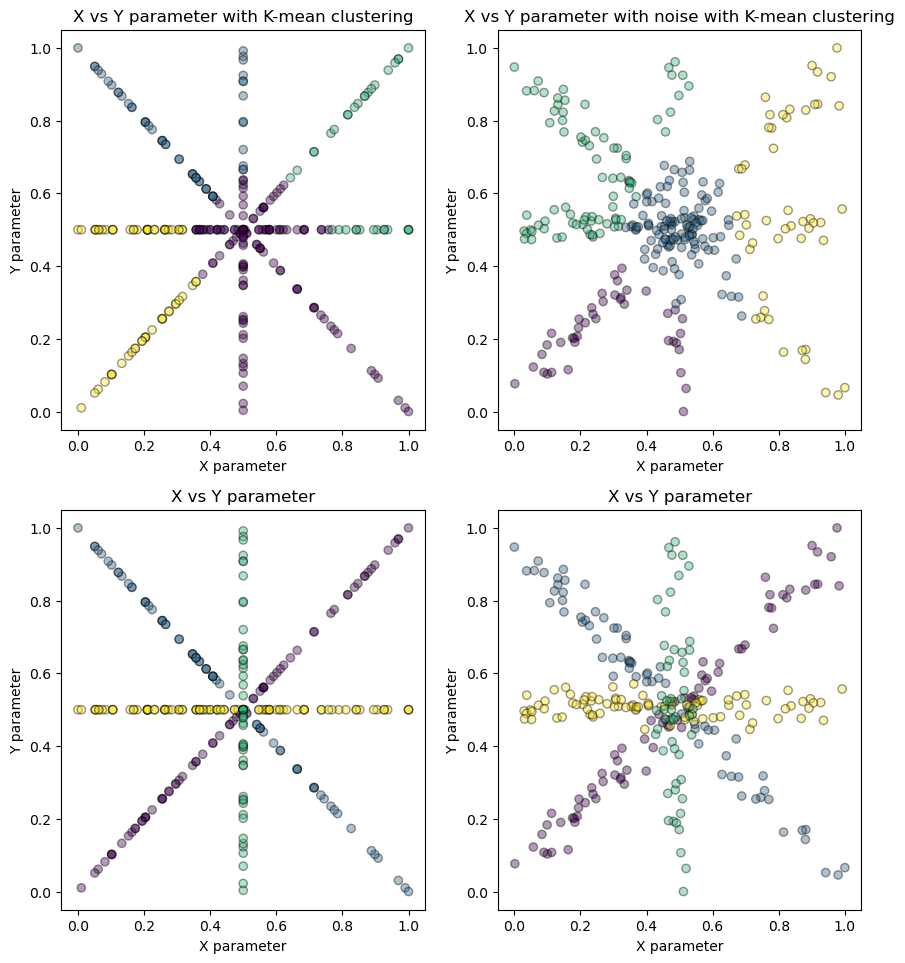

In [70]:
#Scatter Plot compare result of K-mean clustering vs original classification
plt.figure(figsize=(8, 8))

plt.subplot(221)                          # plot the training data and K prototypes
plt.scatter(df7['X'], df7['Y'], c=df7['kMeans'], alpha = 0.4, linewidths=1.0, edgecolors="black")
plt.title('X vs Y parameter with K-mean clustering'); plt.xlabel('X parameter'); plt.ylabel('Y parameter')

plt.subplot(222)                          # plot the training data and K prototypes
plt.scatter(df7['Xn'], df7['Yn'], c=df7['kMeanswnoise'], alpha = 0.4, linewidths=1.0, edgecolors="black")
plt.title('X vs Y parameter with noise with K-mean clustering'); plt.xlabel('X parameter'); plt.ylabel('Y parameter')

plt.subplot(223)                          # plot the training data and K prototypes
plt.scatter(df7['X'], df7['Y'], c=df7['Type'], alpha = 0.4, linewidths=1.0, edgecolors="black")
plt.title('X vs Y parameter'); plt.xlabel('X parameter'); plt.ylabel('Y parameter')

plt.subplot(224)                          # plot the training data and K prototypes
plt.scatter(df7['Xn'], df7['Yn'], c=df7['Type'], alpha = 0.4, linewidths=1.0, edgecolors="black")
plt.title('X vs Y parameter'); plt.xlabel('X parameter'); plt.ylabel('Y parameter')
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.1, wspace=0.2, hspace=0.2)

#### Discussion - df7:
The star data create from 4 different linear line. The category is set from the difference on each line. K-mean clustering cluster the data with the minimizing data in the same group showing cluster result different from the original classification. 

### Walk through process of K-mean clustering
Let's walk through the concept how K-mean clustering move in circle shape

#### Declare Functions

The following functions perform the steps required by K-means clustering.

* assign the training data to the nearest prototype

* update the prototype to the centroid of the assigned training data

In [71]:
# Assignment function to assigned training data to the nearest prototype (code modified from Ben Keen, http://benalexkeen.com/k-means-clustering-in-python/)
def assignment(df, centroids):
    for i in centroids.keys():
        df['distance_from_{}'.format(i)] = (    # use the normalized features and centroids
            np.sqrt(
                (df['X'] - centroids[i][2]) ** 2
                + (df['Yn'] - centroids[i][3]) ** 2
            )
        )
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color'] = df['closest'].map(lambda x: colmap[x])
    return df

# Update function to shift the prototype to the centroid of the training data assigned to the prototype (code modified from Ben Keen, http://benalexkeen.com/k-means-clustering-in-python/)
def update(df,k,x,y,x_noise,y_noise):
    for i in centroids.keys():
        centroids[i][2] = np.mean(df[df['closest'] == i]['X'])
        centroids[i][3] = np.mean(df[df['closest'] == i]['Yn'])
        centroids[i][0] = np.mean(df[df['closest'] == i]['X'])
        centroids[i][1] = np.mean(df[df['closest'] == i]['Y'])
    return k

#### Initialize K Prototypes

1. Assign K prototypes in the feature space randomly.

* for K prototypes assign a random X and Y

We will do this and then visualize the prototypes as red, green, blue etc. dots.

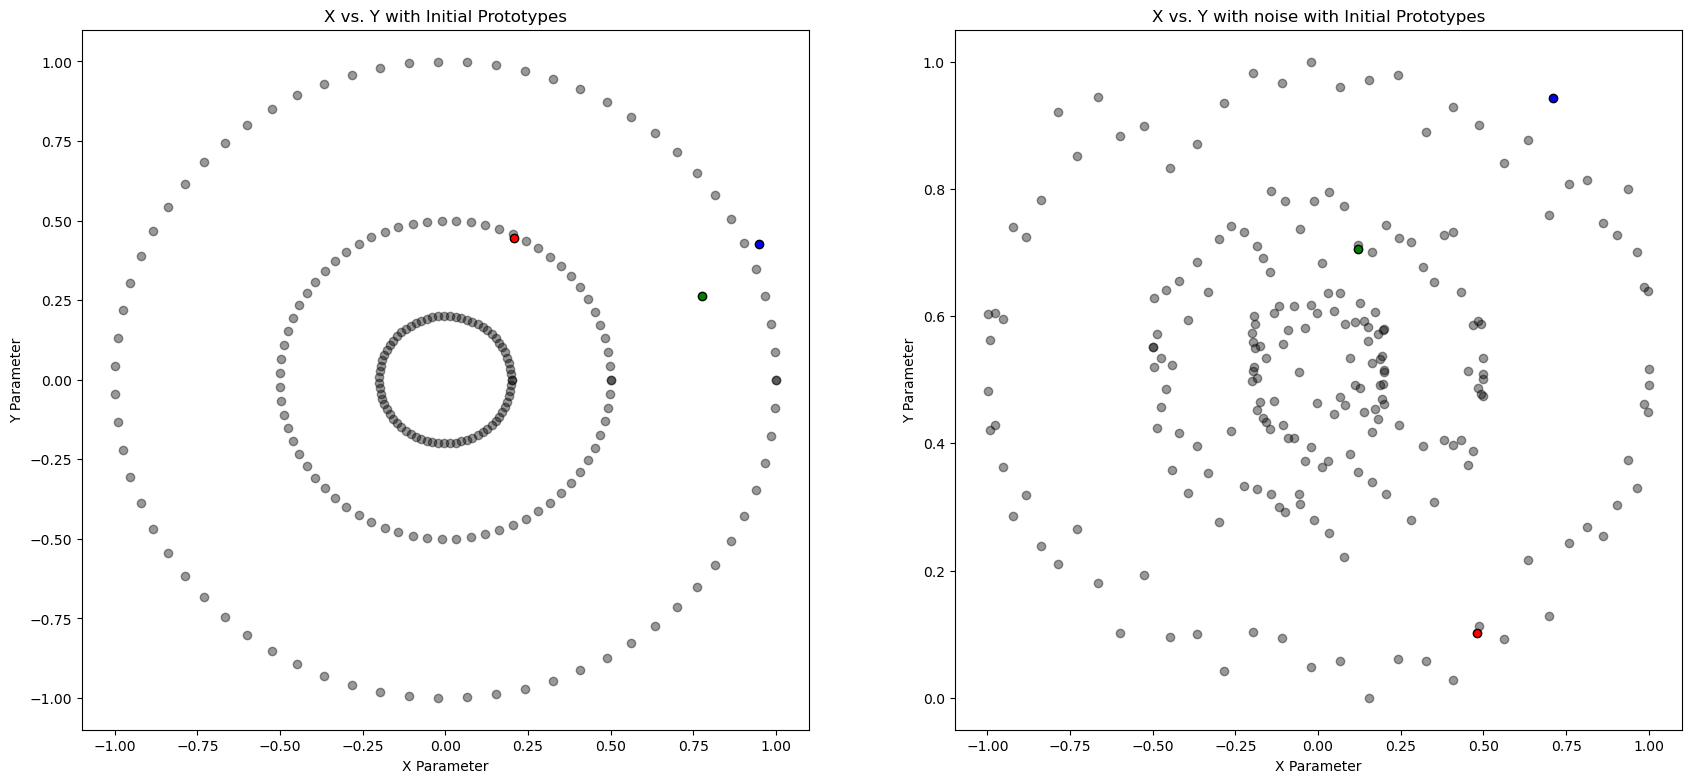

In [72]:
# Assign Initial Prototypes 
K = 3
centroids = {}
colmap = {1: 'r', 2: 'g', 3: 'b', 4: 'm', 5: 'c', 6: 'k', 7: 'w'}
np.random.seed(1350)
for i in range(K):
    x = np.random.random(); x_noise = np.random.random()
    y = np.random.random(); y_noise = np.random.random()
    centroids[i+1] = [x,y,x_noise,y_noise]
    
plt.figure(figsize=(8, 7))
plt.subplot(121)                          # plot the training data and K prototypes
plt.scatter(df3['X'], df3['Y'], c="black", alpha = 0.4, linewidths=1.0, edgecolors="black")
for i in centroids.keys():
    plt.scatter(centroids.get(i)[0], centroids.get(i)[1], color=colmap[i],linewidths=1.0, edgecolors="black")
plt.title('X vs. Y with Initial Prototypes'); plt.xlabel('X Parameter'); plt.ylabel('Y Parameter')
#plt.xlim(por_min, por_max)
#plt.ylim(AI_min, AI_max)
#plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.0, wspace=0.2, hspace=0.2)

plt.subplot(122)                          # plot the training data and K prototypes
plt.scatter(df3['X'], df3['Yn'], c="black", alpha = 0.4, linewidths=1.0, edgecolors="black")
for i in centroids.keys():
    plt.scatter(centroids.get(i)[2], centroids.get(i)[3], color=colmap[i],linewidths=1.0, edgecolors="black")
plt.title('X vs. Y with noise with Initial Prototypes'); plt.xlabel('X Parameter'); plt.ylabel('Y Parameter')
#plt.xlim(0, 1)
#plt.ylim(0, 1)
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.2, hspace=0.2)

#### Assignment of Training Data
All training data are assigned to the nearest prototype.

Using assignment function
df = assignment(df, centroids) 
We show in normal circle shape and circle shape with nosie.

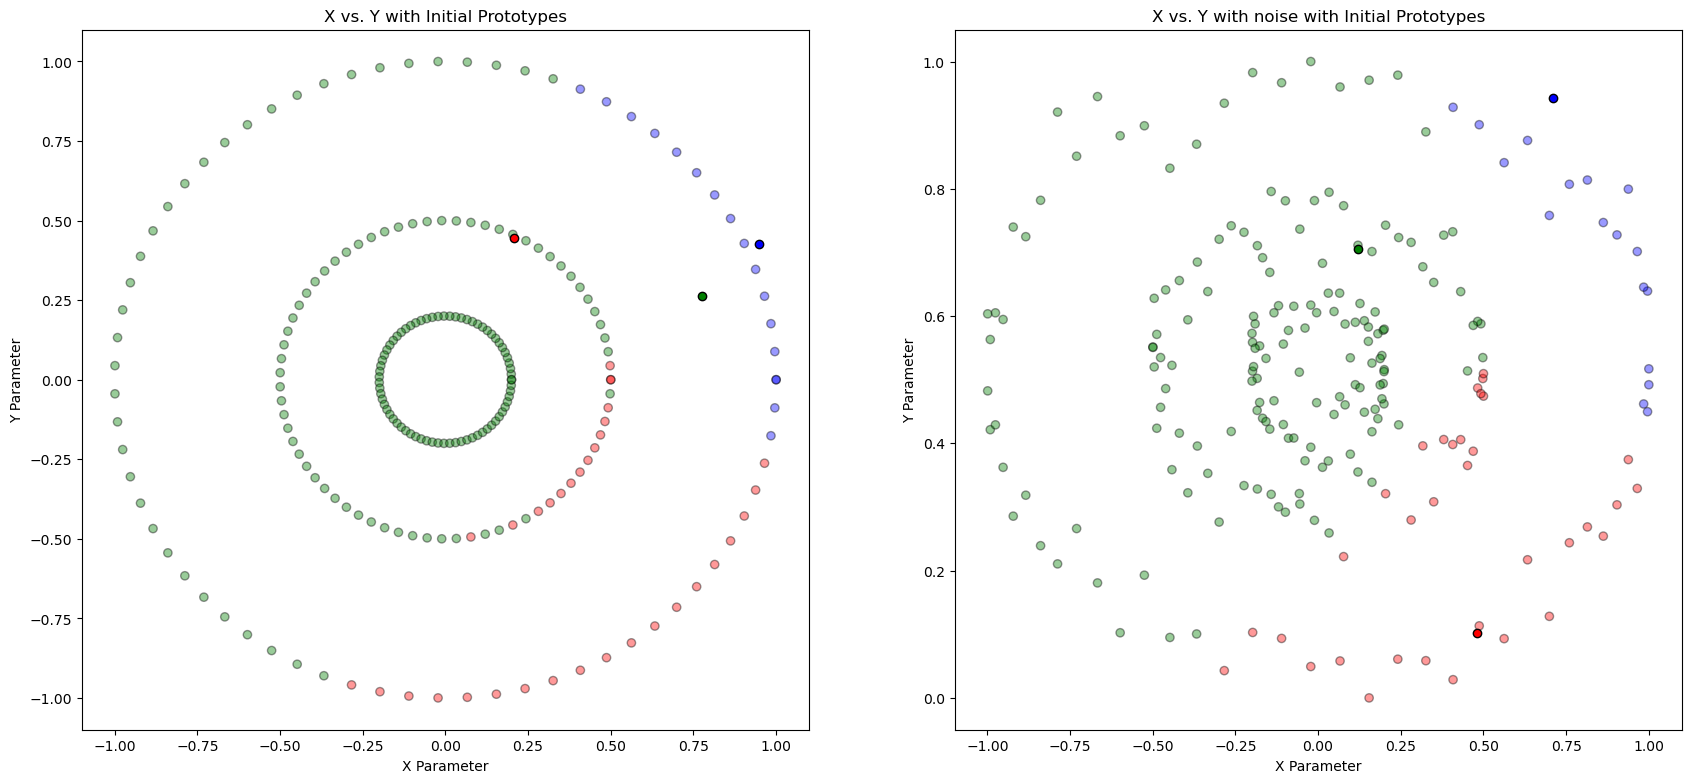

In [73]:
df3n = assignment(df3, centroids)            # assign training data to the nearest prototype

plt.figure(figsize=(8, 7))
plt.subplot(121)
# plot the assigned training data and K prototypes
plt.scatter(df3n['X'], df3n['Y'], color=df3n['color'], alpha = 0.4, linewidths=1.0, edgecolors="k")
for i in centroids.keys():
    plt.scatter(centroids.get(i)[0], centroids.get(i)[1], color=colmap[i],linewidths=1.0, edgecolors="black")
plt.title('X vs. Y with Initial Prototypes'); plt.xlabel('X Parameter'); plt.ylabel('Y Parameter')

plt.subplot(122)                          # plot the training data and K prototypes
plt.scatter(df3n['X'], df3n['Yn'],  c=df3n['color'], alpha = 0.4, linewidths=1.0, edgecolors="black")
for i in centroids.keys():
    plt.scatter(centroids.get(i)[2], centroids.get(i)[3], color=colmap[i],linewidths=1.0, edgecolors="black")
plt.title('X vs. Y with noise with Initial Prototypes'); plt.xlabel('X Parameter'); plt.ylabel('Y Parameter')
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.2, hspace=0.2)

#### Update the Prototypes
Now we reassign the prototypes to the centroids of the training data belonging to each.

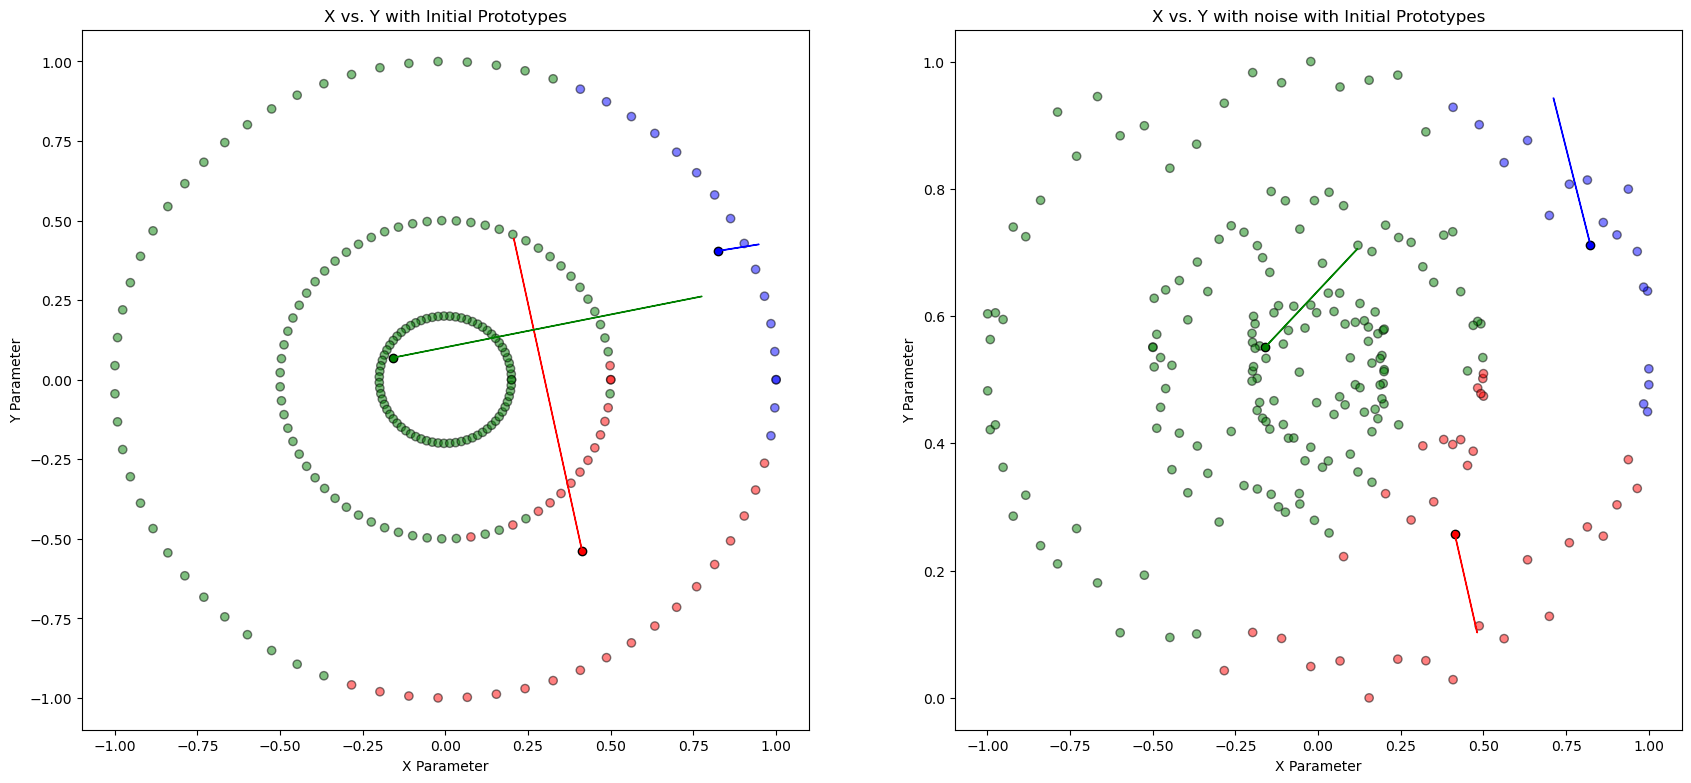

In [74]:
old_centroids = copy.deepcopy(centroids)
centroids = update(df3n, centroids,x,y,x_noise,y_noise)

plt.figure(figsize=(8, 7))
plt.subplot(121)                          # plot the assigned training data and K prototypes
ax = plt.gca()
plt.scatter(df3n['X'], df3n['Y'], color=df3n['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(centroids.get(i)[0], centroids.get(i)[1], color=colmap[i],linewidths=1.0, edgecolors="black")
plt.title('X vs. Y with Initial Prototypes'); plt.xlabel('X Parameter'); plt.ylabel('Y Parameter')

for i in old_centroids.keys():
    old_x = old_centroids[i][0]
    old_y = old_centroids[i][1]
    dx = (centroids[i][0] - old_centroids[i][0]) 
    dy = (centroids[i][1] - old_centroids[i][1]) 
    ax.arrow(old_x, old_y, dx, dy,fc=colmap[i], ec=colmap[i])

plt.subplot(122)                          # plot the assigned training data and K prototypes
ax = plt.gca()
plt.scatter(df3n['X'], df3n['Yn'], color=df3n['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(centroids.get(i)[2], centroids.get(i)[3], color=colmap[i],linewidths=1.0, edgecolors="black")
plt.title('X vs. Y with noise with Initial Prototypes'); plt.xlabel('X Parameter'); plt.ylabel('Y Parameter')

for i in old_centroids.keys():
    old_x = old_centroids[i][2]
    old_y = old_centroids[i][3]
    dx = (centroids[i][2] - old_centroids[i][2]) 
    dy = (centroids[i][3] - old_centroids[i][3]) 
    ax.arrow(old_x, old_y, dx, dy,fc=colmap[i], ec=colmap[i])
      
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.2, hspace=0.2)

#### Repeat the Assignment of the Training Data
Once again we assign the training data to the nearest prototype.

Note the prototypes were updated in the previous step so the assignments may change

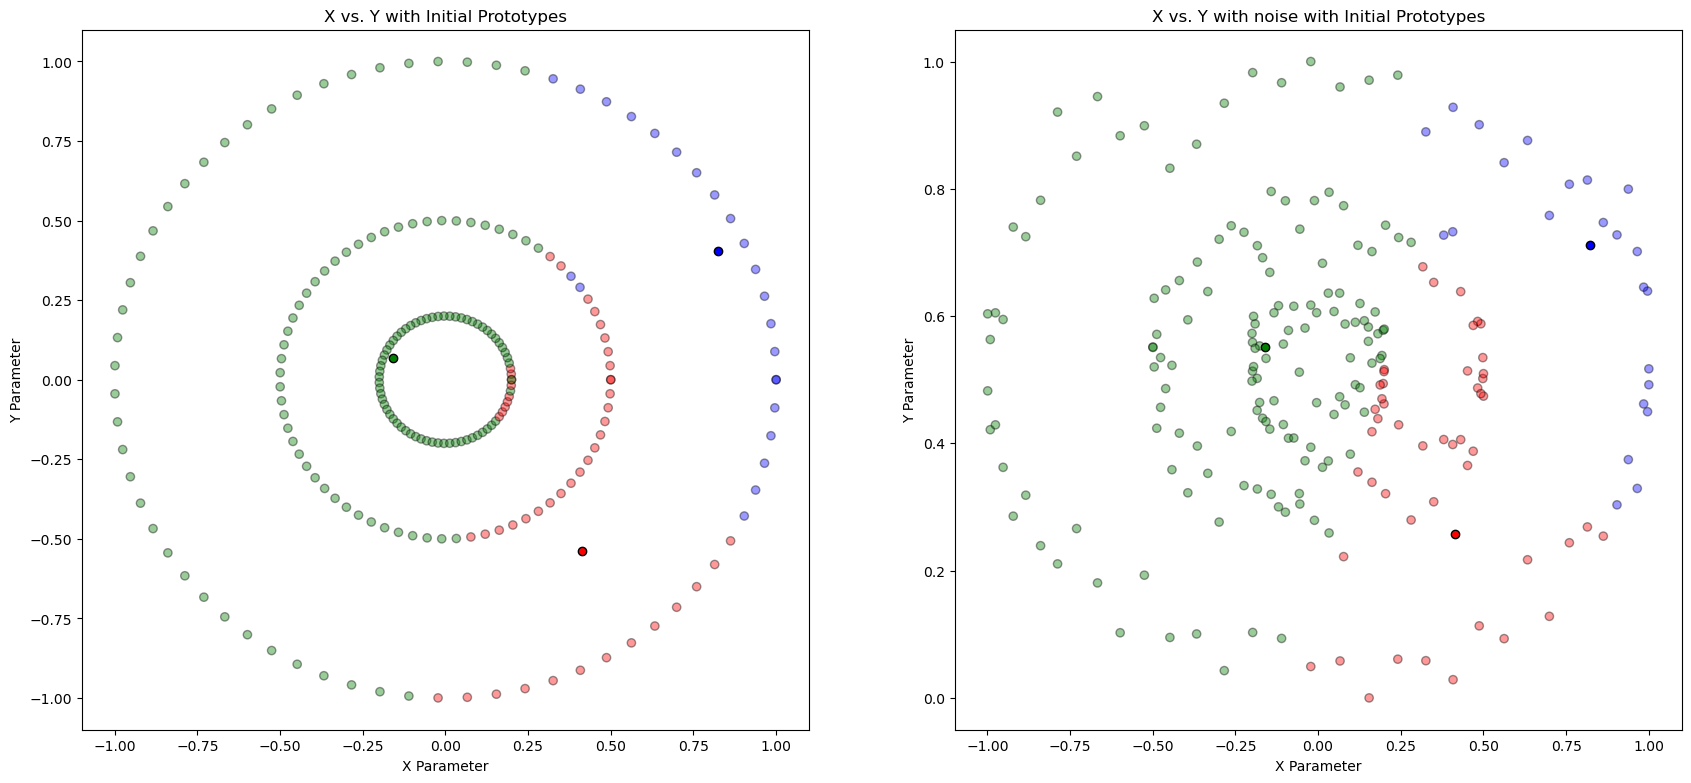

In [75]:
df3n = assignment(df3n, centroids)

plt.figure(figsize=(8, 7))
plt.subplot(121)                          # plot the assigned training data and K prototypes
plt.scatter(df3n['X'], df3n['Y'], color=df3n['color'], alpha = 0.4, linewidths=1.0, edgecolors="k")
for i in centroids.keys():
    plt.scatter(centroids.get(i)[0], centroids.get(i)[1], color=colmap[i],linewidths=1.0, edgecolors="black")
plt.title('X vs. Y with Initial Prototypes'); plt.xlabel('X Parameter'); plt.ylabel('Y Parameter')

plt.subplot(122)                          # plot the training data and K prototypes
plt.scatter(df3n['X'], df3n['Yn'],  c=df3n['color'], alpha = 0.4, linewidths=1.0, edgecolors="black")
for i in centroids.keys():
    plt.scatter(centroids.get(i)[2], centroids.get(i)[3], color=colmap[i],linewidths=1.0, edgecolors="black")
plt.title('X vs. Y with noise with Initial Prototypes'); plt.xlabel('X Parameter'); plt.ylabel('Y Parameter')
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.2, hspace=0.2)

#### Iterate Until Convergence
Now we interate over the the previous set of steps:

* assign the training data to the nearest prototype

* update the prototypes

We do this until there is no further chance in the category assigned to each of the training data.

Iteration:
2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 

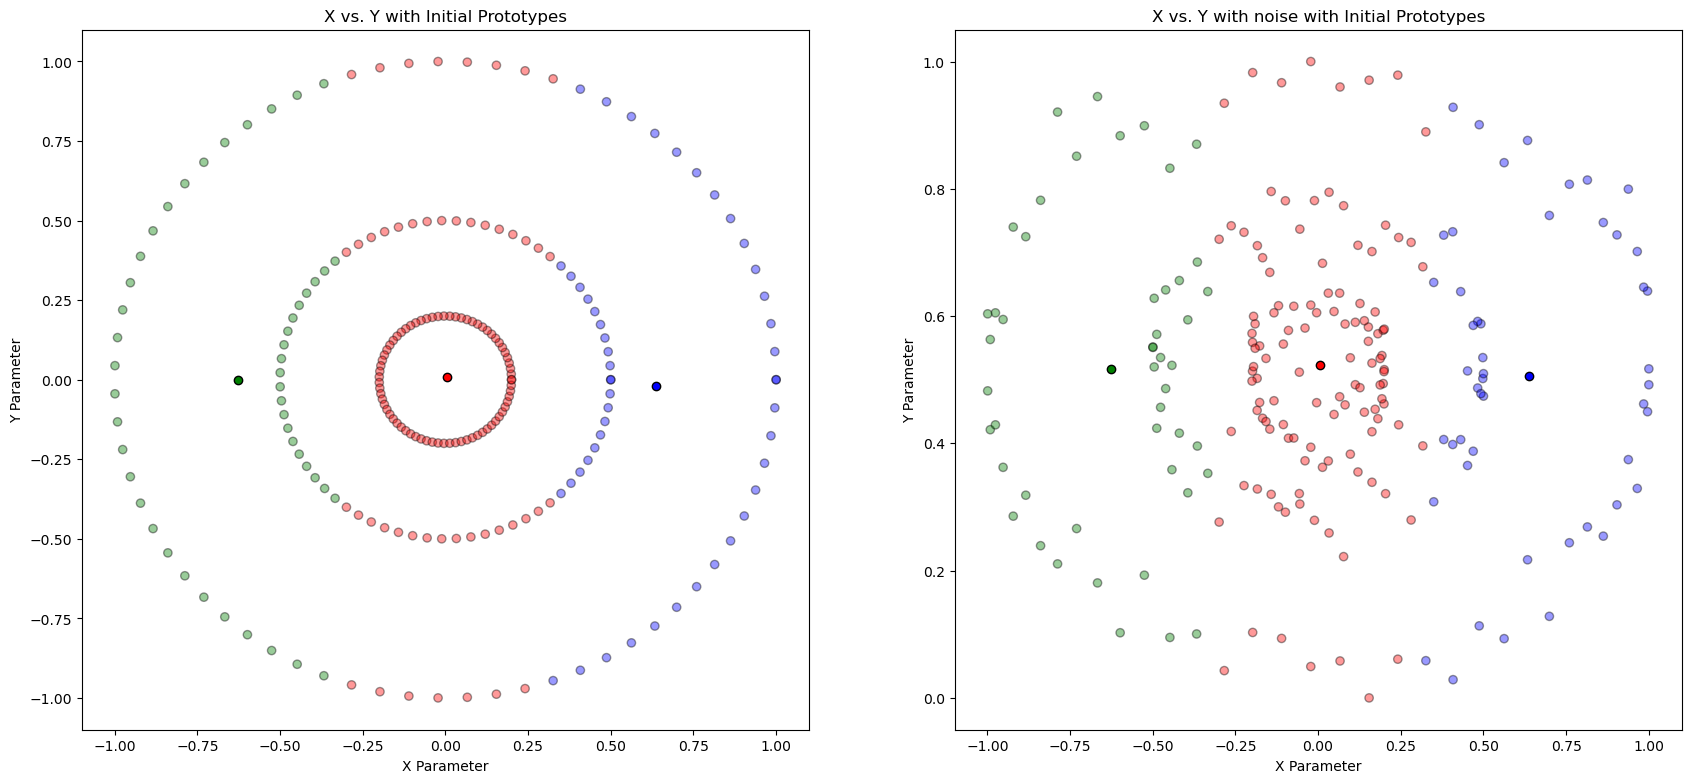

In [76]:
# Continue until all assigned categories don't change any more (code modified from Ben Keen, http://benalexkeen.com/k-means-clustering-in-python/)

iteration = 2
print('Iteration:')
while True:
    print(iteration, end =" ")
    closest_centroids = df3n['closest'].copy(deep=True)
    centroids = update(df3n,centroids,x, y, x_noise, y_noise)
    df3n = assignment(df3n, centroids)
    if closest_centroids.equals(df3n['closest']):
        break
    iteration = iteration + 1

plt.figure(figsize=(8, 7))
plt.subplot(121)                          # plot the assigned training data and K prototypes
plt.scatter(df3n['X'], df3n['Y'], color=df3n['color'], alpha = 0.4, linewidths=1.0, edgecolors="k")
for i in centroids.keys():
    plt.scatter(centroids.get(i)[0], centroids.get(i)[1], color=colmap[i],linewidths=1.0, edgecolors="black")
plt.title('X vs. Y with Initial Prototypes'); plt.xlabel('X Parameter'); plt.ylabel('Y Parameter')

plt.subplot(122)                          # plot the training data and K prototypes
plt.scatter(df3n['X'], df3n['Yn'],  c=df3n['color'], alpha = 0.4, linewidths=1.0, edgecolors="black")
for i in centroids.keys():
    plt.scatter(centroids.get(i)[2], centroids.get(i)[3], color=colmap[i],linewidths=1.0, edgecolors="black")
plt.title('X vs. Y with noise with Initial Prototypes'); plt.xlabel('X Parameter'); plt.ylabel('Y Parameter')
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.2, hspace=0.2)

#### Discussion of walk through process 
From the walk through process show how K-mean clustering cluster the data which base on the minimization of distance between data in the same group. The clustering pattern might be change depending on the start random value and also the global and local position since K-mean is hueristic method.

### Selecting the Optimum Number of Clusters
The number of clusters (k) is hyperparameter to be tuned. The proper K-value is the value that optimum loss function (inertia) with the number of k. This value can find from Plot the loss function (inertia) vs the number of cluster (k) after loop over k cluster to find inertia. The proper k number is elbow of the curve.

Note: Inertia (W)

![](Inertia.png)

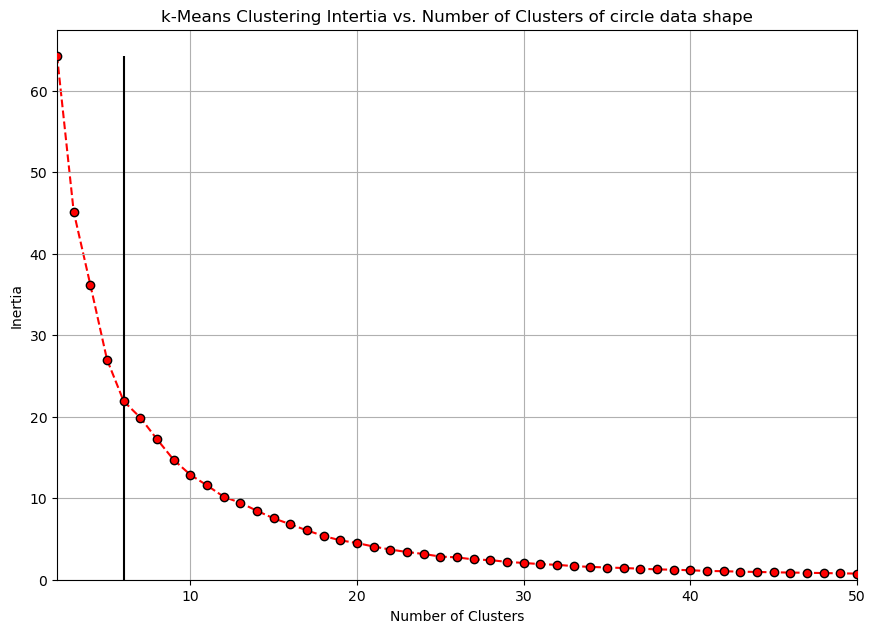

In [77]:
# Find K of circle shape data
max_K = 50                                      # maximum number of clusters, k
inertia = []
for k in range(2,max_K+1):
    kmeans_iter = KMeans(n_clusters=k, random_state=14, n_init = 10).fit(df3.loc[:,['X','Y']].values)
    inertia.append(kmeans_iter.inertia_)

plt.figure(figsize=(8, 5))
plt.scatter(range(2,max_K+1),inertia,c='red',edgecolor='black',zorder=10)
plt.plot(range(2,max_K+1),inertia,c='red',ls='--',zorder=1)
plt.xlim(2,max_K); plt.xlabel('Number of Clusters'); plt.ylabel('Inertia'); plt.ylim(bottom=0)
plt.vlines(6,0,np.max(inertia),color='black'); plt.grid(True); plt.title('k-Means Clustering Intertia vs. Number of Clusters of circle data shape')
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.1, wspace=0.2, hspace=0.2)

The plot above is to tune hyperparameter which is K value for a number of clusters of circle shape data. The suitable k from the graph in 6.

Let's see the plot for the subsurface data value which seem to be more suitable clustered by K-mean Clustering method

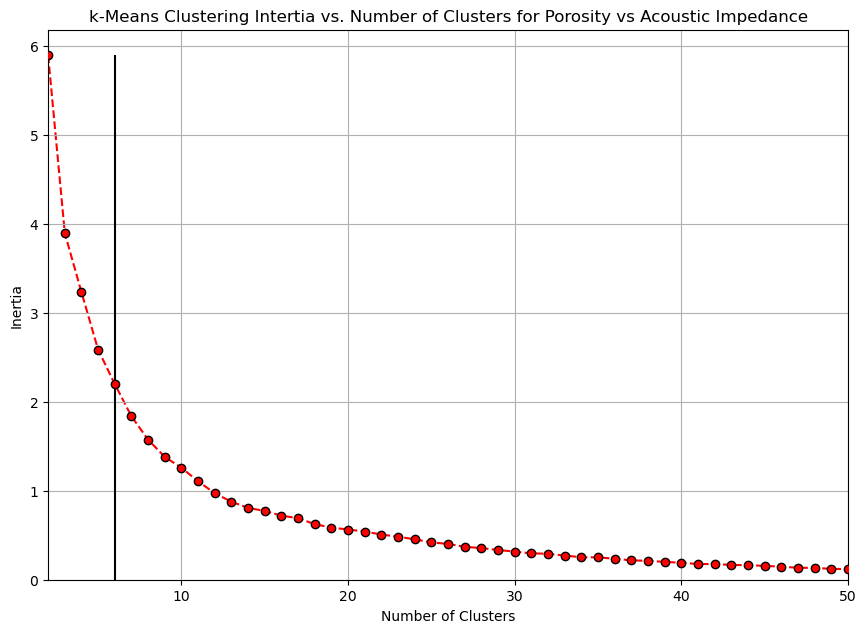

In [78]:
# Find K of subsurface data
max_K = 50                                      # maximum number of clusters, k
inertia = []
for k in range(2,max_K+1):
    kmeans_iter = KMeans(n_clusters=k, random_state=14, n_init = 10).fit(df0.loc[:,['nPorosity','nAI']].values)
    inertia.append(kmeans_iter.inertia_)

plt.figure(figsize=(8, 5))
plt.scatter(range(2,max_K+1),inertia,c='red',edgecolor='black',zorder=10)
plt.plot(range(2,max_K+1),inertia,c='red',ls='--',zorder=1)
plt.xlim(2,max_K); plt.xlabel('Number of Clusters'); plt.ylabel('Inertia'); plt.ylim(bottom=0)
plt.vlines(6,0,np.max(inertia),color='black'); plt.grid(True); plt.title('k-Means Clustering Intertia vs. Number of Clusters for Porosity vs Acoustic Impedance')
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.1, wspace=0.2, hspace=0.2)

### Result Summary
This project has an objective to show the effect of data shape to data cluster by K-mean clustering method. Since K-mean use the principle to cluster by the given k value of cluster. Then, random initia sample of each group and assign data to the group base on the minimum distance between data within the same geoup. Then, the process is iterated until no more change on centroid of cluster. With this basic, K-mean clusters the data from the distance. Thus, data which has specific shape, specific correlation might not be work with K-mean clustering method. DBSCAN, Spectral Clustering or other clustering methods are the alternative method when the data not match with K-mean clustering assumption.

Note: SInce this project focus on the data shape, the data is mostly show only x and y data and no unit. The data is normalized to suitable for this method. In fact, K-mean clustering can deal with any parameter to group the data by minimize the distance/dissimilarity between data inside the group inself.